Array Pattern
====
Last update: 7 July 2018

Reads array factor and element pattern and plots directivity and gain.  Calculates beanwidth etc.  

From Working Group 2 meeting.
| Frequency (MHz) | 1435 | 1480 | 1525 |
|:----------------|:----:|:----:|:----:|
| N elements | 140 | 140 | 140 |
|Area (sqft) | 23.2 | 23.2 | 23.2 |
| Element directivity (dBi) | 5.6 | 5.6 | 5.6 |
| Array directivity (dBi) | 28.6 | 28.8 | 29.1 |
| Estimated Beamwidth (deg) | 4.0 | 3.9 | 3.7 |


# Power gain
Power gain (or simply gain) is a unitless measure that combines an antenna's efficiency $E_{antenna}$ and directivity D:

$G=E_{antenna}\cdot D$.

# Efficiency
A transmitting antenna accepts input power $P_{in}$ at some point along the feedline. The point is typically taken to be at the antenna (the feedpoint), thereby not counting power lost due to joule heating in the feedline and reflections back down the feedline. The efficiency $E_{antenna}$ of an antenna is the total radiated power $P_{o}$ divided by the input power at the feedpoint  

$E_{antenna}=\frac {P_{o}}{P_{in}}$  

The electromagnetic reciprocity theorem guarantees that the electrical properties of an antenna, such as efficiency, directivity, and gain, are the same when the antenna is used for receiving as when it is transmitting.

# Directivity
Antennas are invariably directional to a greater or lesser extent, according to how the output power is distributed in any given direction in three dimensions. We shall specify direction here in spherical coordinates $(\theta,\phi)$, where $\theta$  is the altitude or angle above a specified reference plane (such as the ground), while $\phi$  is the azimuth as the angle between the projection of the given direction onto the reference plane and a specified reference direction (such as north or east) in that plane with specified sign (either clockwise or counterclockwise).  

The distribution of output power as a function of the possible directions  $(\theta,\phi)$ is given by its radiation intensity $U(\theta,\phi)$ (in SI units: watts per steradian, $W⋅sr^{-1}$). The output power is obtained from the radiation intensity by integrating the latter over all solid angles $d\Omega =\sin \theta d\theta d\phi$:  

$P_{o}=\int _{-\pi }^{\pi }\int _{-\pi /2}^{\pi /2}U(\theta ,\phi )d\Omega =\int _{-\pi }^{\pi }\int _{-\pi /2}^{\pi /2}U(\theta ,\phi )\sin \theta d\theta d\phi$  

The mean radiation intensity $\overline U$ is therefore given by $\overline {U}={\frac {P_{o}}{4\pi }}$ since there are $4\pi$ steradians in a sphere $\frac {E_{antenna}\cdot P_{in}}{4\pi}$ using the first formula for $P_{o}$.  

The directive gain or directivity $D(\theta,\phi)$ of an antenna in a given direction is the ratio of its radiation intensity $U(\theta,\phi)$ in that direction to its mean radiation intensity $\overline U$. That is,  

$D(\theta,\phi)=U(\theta,\phi)/\overline U$.

An isotropic antenna, meaning one with the same radiation intensity in all directions, therefore has directivity 1 in all directions independently of its efficiency. More generally the maximum, minimum, and mean directivities of any antenna are always at least 1, at most 1, and exactly 1.  


When the directivity D of an antenna is given independently of direction it refers to its maximum directivity in any direction, namely  

$D=\max _{{\theta,\phi}}D(\theta,\phi)$.  

# Gain
The power gain or simply gain $G(\theta,\phi)$ of an antenna in a given direction takes efficiency into account by being defined as the ratio of its radiation intensity $U(\theta,\phi)$ in that direction to the mean radiation intensity of a perfectly efficient antenna. Since the latter equals $P_{{in}}/4\pi$, it is therefore given by:  

$G(\theta,\phi)=\frac {U(\theta,\phi)}{P_{in}/4\pi}$  

$=E_{antenna}\cdot \frac {U(\theta,\phi)}{\overline U}$ using the second equation for $\overline U$  
$=E_{antenna}\cdot D(\theta,\phi)$ using the equation for $D(\theta,\phi)$.  

As with directivity, when the gain G of an antenna is given independently of direction it refers to its maximum gain in any direction. Since the only difference between gain and directivity in any direction is a constant factor of $E_{antenna}$ independent of $\theta$  and $\phi$, we obtain the fundamental formula of this section:  

$G=E_{antenna}\cdot D$.  

If only a certain portion of the electrical power received from the transmitter is actually radiated by the antenna (i.e. less than 100% efficiency), then the directive gain compares the power radiated in a given direction to that reduced power (instead of the total power received), ignoring the inefficiency. The directivity is therefore the maximum directive gain when taken over all directions, and is always at least 1.  

On the other hand, the power gain takes into account the poorer efficiency by comparing the radiated power in a given direction to the actual power that the antenna receives from the transmitter, which makes it a more useful figure of merit for the antenna's contribution to the ability of a transmitter in sending a radio wave toward a receiver. In every direction, the power gain of an isotropic antenna is equal to the efficiency, and hence is always at most 1, though it can and ideally should exceed 1 for a directional antenna.  

References:  
1) Wikipedia contributors. (2018, September 6). Antenna gain. In Wikipedia, The Free Encyclopedia. Retrieved 15:50, October 7, 2018, from https://en.wikipedia.org/w/index.php?title=Antenna_gain&oldid=858383992  
2) Antenna Theory (3rd edition), by C. Balanis, Wiley, 2005, ISBN 0-471-66782-X  
3) Antenna for all applications (3rd edition), by John D. Kraus, Ronald J. Marhefka, 2002, ISBN 0-07-232103-2  




OLD
----
In an antenna array (a set of multiple identical antennas which work together as a single antenna), the directivity of the entire array is the multiplicative sum of the individual antenna's directivity function with a mathematical expression known as the array factor {\displaystyle AF} {\displaystyle AF}, which typically depends on the location, the excitation and the phase of each antenna element.  


Array dimensions are in units of wavelength $\lambda$  

Code to display the array factor for planar phased array.  
https://github.com/zinka/arraytool  

review equations here:  
http://www.antenna-theory.com/arrays/weights/twoDuniform.php  


In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read array factor from pickel file
AF = pickle.load(open("AF.pkl", "rb")) # data file created by 'Array factor.ipynb'

# read element pattern
R = pickle.load(open("EP.pkl", "rb")) # data file created by 'element pattern.ipynb'  <--- need to pay attenention to the units

# calculate array radiation pattern
D = R*AF # is this directivity? or intensity?  <---------------- need to research this  probably D

In [3]:
print('max value in array factor = {:.1f} dB'.format(10*np.log(np.abs(AF).max())))
print('max value in element pattern = {:.1f} dB'.format(10*np.log(np.abs(R).max())))
print('max array value = {:.1f} dB'.format(10*np.log(np.abs(D.max())/(4*np.pi))))

max value in array factor = 98.8 dB
max value in element pattern = 0.0 dB
max array value = 73.5 dB


In [4]:
print('max array value = {:.1f}'.format(np.abs(D).max()))

max array value = 19600.0


In [6]:
D

array([[ -1.30892924 +1.02434197j,  -1.29846000 +0.97561956j,
         -1.22699886 +0.88475315j, ...,  -1.00115578 +0.88334568j,
         -1.15373972 +0.97836547j,  -1.25911881 +1.0258907j ],
       [-13.28222656+10.06214436j, -13.16941178 +9.57530522j,
        -12.43829162 +8.67541761j, ..., -10.17385196 +8.69621274j,
        -11.71881023 +9.62514706j, -12.78302581+10.08534222j],
       [-27.11352759+19.80637762j, -26.86795174+18.82900559j,
        -25.36049226+17.04004973j, ..., -20.79699004+17.15759822j,
        -23.94511656+18.97759879j, -26.10776402+19.86964871j],
       ..., 
       [-27.11352759+19.80637762j, -26.10776402+19.86964871j,
        -23.94511656+18.97759879j, ..., -22.66934712+14.59447404j,
        -25.36049226+17.04004973j, -26.86795174+18.82900559j],
       [-13.28222656+10.06214436j, -12.78302581+10.08534222j,
        -11.71881023 +9.62514706j, ..., -11.12578733 +7.43963951j,
        -12.43829162 +8.67541761j, -13.16941178 +9.57530522j],
       [ -1.30892924 +1.024

In [7]:
D.max()

(19600.000001492626+0j)

In [11]:
20*np.log10(np.abs(D).max()/(4*np.pi))

63.860924147349067

(-4186.720661292914+24.116031054219068j)

# Array radiation patterns

## Contour plot

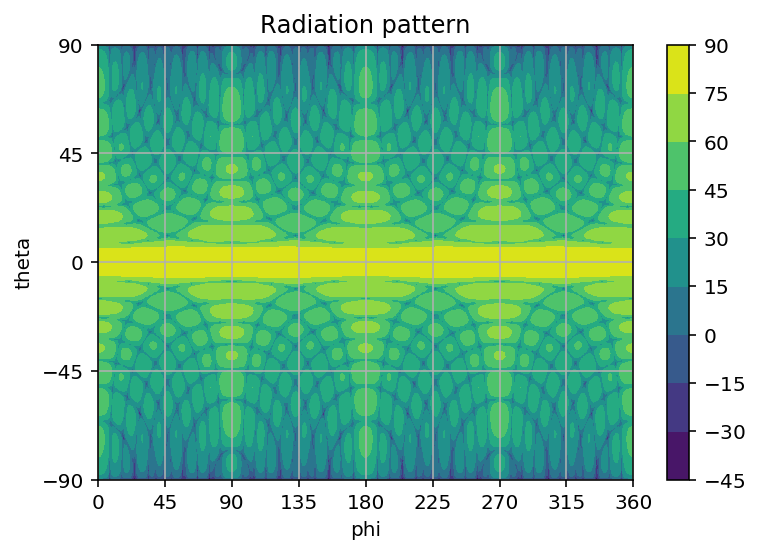

In [12]:
step = 1  # step size for various ranges
theta_min = -90
theta_max = 90
phi_min = 0
phi_max = 360

D_plt = 20*np.log10(np.abs(D)) # convert to dB magnitude for plotting
D_plt  = np.clip(D_plt,-40,np.inf) # set limits for plotted data

theta = np.arange(theta_min,theta_max+1,step) # include end points
phi = np.arange(phi_min,phi_max,step)
X1, Y1 = np.meshgrid(phi, theta)

plt.contourf(X1,Y1,D_plt,10)
plt.grid(True)
plt.xlabel('phi')
plt.ylabel('theta')
plt.ylim(theta_min,theta_max)
plt.yticks(np.arange(theta_min, theta_max+1, step=45))
plt.xlim(phi_min,phi_max)
plt.xticks(np.arange(phi_min, phi_max+1, step=45))
plt.colorbar(format='$%.0f$')
plt.title('Radiation pattern')
plt.show()

## principle plane cuts

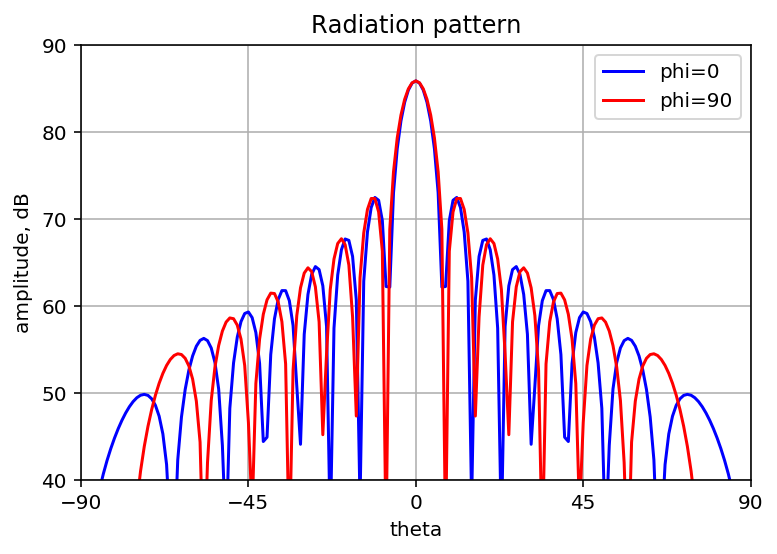

In [13]:
# plotting principle plane cuts
plt.plot(theta,20*np.log10(np.abs(D[:,0])),'b',label='phi=0')
plt.plot(theta,20*np.log10(np.abs(D[:,int(90/step)])),'r',label='phi=90')
plt.grid(True)
plt.legend()
plt.xlabel('theta')
plt.ylabel('amplitude, dB')
plt.ylim(40,90)
# set plot limits
#theta_min = -50
#theta_max = 50
plt.xlim(theta_min,theta_max)
plt.xticks(np.arange(theta_min, theta_max+1, step=45))
plt.title('Radiation pattern')
plt.show()

## Polar plot

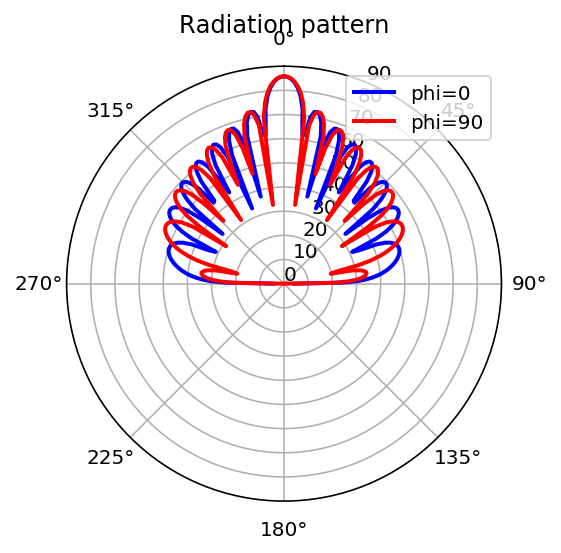

In [14]:
# plot data in polar format
# The 111 specifies 1 row, 1 column on subplot #1
ax = plt.subplot(111, polar=True)
ax.grid(True)
minGrid = 0 #set plot grid
maxGrid = 100
gridSpacing = 10
ax.set_yticks(np.arange(minGrid,maxGrid,gridSpacing))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.autoscale(enable=False)

# convert deg to radians
theta_min = -90
theta_max = 90
theta = np.arange(theta_min,theta_max+1,step)*np.pi/180

# Polar plot
ax.plot(theta,20*np.log10(np.abs(D[:,0])),'b',linewidth = 2,label='phi=0')
ax.plot(theta,20*np.log10(np.abs(D[:,int(90/step)])),'r',linewidth = 2,label='phi=90')

# Setting the graph title & legend
plt.title('Radiation pattern')
plt.legend()
plt.show()

# radiation intensity $U(\theta,\phi)$


# Gain

# Beamwidth

# Side lobes

# Grating lobes

# Example from Wikipedia
See the wikipedia example:  
https://en.wikipedia.org/wiki/Antenna_gain  

# OLD

In [0]:
Lam = 1 # lambda (or wavelength) is 1

m = 14 # number of elements along x axis
n = 10 # number of elements along y axis
d = Lam/2 # spacing between points
x = np.ones(m*n) # array of element x positions
y = np.ones(m*n) # array of element y positions
print('number of elements = {:d}'.format(m*n))

In [0]:
# generate coordinate points for hexagonal pattern
for j in range(n):
    for i in range(m):
        if j%2:
            x[i+m*j] = i*d + d/2
        else:
            x[i+m*j] = i*d
        y[i+m*j] = j*d*np.sqrt(3)/2

In [0]:
# generate coordinate points for rectangular pattern
for j in range(n):
    for i in range(m):
        x[i+m*j] = i*d
        y[i+m*j] = j*d

In [0]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
plt.plot(x,y,'o')
plt.show()

In [0]:
# set the element weights
A = np.ones((n,m)) # Uniform planar excitation

In [0]:
# center the array in coordinate system
[x1, y1] = np.mgrid[0:m, 0:n]
x1 = (x - x[m-1]/2).T
y1 = (y - y[-1]/2).T

In [0]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
plt.plot(x1,y1,'o')
plt.show()

# Calculate array factor
see Antennas, by Blake, pages 209 to 210

The wave number defined as the number of radians per unit distance, sometimes called the angular wavenumber.  

$k =\frac {2\pi }{\lambda }$  

The angle $\theta$ varies from 0 to 180 degrees and the angle $\phi$ varies from 0 to 360 degrees.  
Essentially, the angle $\phi$ remains in the xy-plane and “pulls” $\theta$ around the z-axis.  

Need to make sure that $\theta$ and $\phi$ run in the same order and limits when generating other data arrays.

In [0]:
k = 2*np.pi/Lam # wave number

In [0]:
# set scan angle
Td = 0*np.pi/180 # scan angle in theta direction
Pd = 0*np.pi/180 # scan angle in phi direction
Wnx = np.exp(1j*k*np.sin(Td)*np.cos(Td)*x1)
Wny = np.exp(1j*k*np.sin(Td)*np.sin(Pd)*y1)

In [0]:
# make variables theta and phi and convert to radians
step = 2  # step size for various ranges
theta_min = 0
theta_max = 180
phi_min = 0
phi_max = 360
# convert deg to radians
theta = np.arange(theta_min,theta_max+1,step)*np.pi/180 # include end points
phi = np.arange(phi_min,phi_max,step)*np.pi/180

AF = np.zeros((len(theta),len(phi)),dtype=complex)
for i in range(len(theta)):
    for j in range(len(phi)):
        s1 = np.sum(Wnx*np.exp(-1j*k*x1*np.sin(theta[i])*np.cos(phi[j])))
        s2 = np.sum(Wny*np.exp(-1j*k*y1*np.sin(theta[i])*np.sin(phi[j])))
        AF[i,j] = s1*s2

In [0]:
# export data file
pickle.dump(AF, open( "AF.pkl", "wb" ))

# Plot array factor
$\theta$ is varied from -90 to 90 degrees and $\phi$ is varied from 0 to 360 degrees.  

In [0]:
# make variables theta and phi and convert to radians
step = 2  # step size for various ranges
theta_min = -90
theta_max = 90
phi_min = 0
phi_max = 360
# convert deg to radians
theta = np.arange(theta_min,theta_max+1,step)*np.pi/180 # include end points
phi = np.arange(phi_min,phi_max,step)*np.pi/180

AF = np.zeros((len(theta),len(phi)),dtype=complex)
for i in range(len(theta)):
    for j in range(len(phi)):
        s1 = np.sum(Wnx*np.exp(-1j*k*x1*np.sin(theta[i])*np.cos(phi[j])))
        s2 = np.sum(Wny*np.exp(-1j*k*y1*np.sin(theta[i])*np.sin(phi[j])))
        AF[i,j] = s1*s2

In [0]:
AF_plt = 20*np.log10(abs(AF)) # convert to dB magnitude for plotting
AF_plt  = np.clip(AF_plt,-40,np.inf) # set limits for plotted data

# re-build theta and phi in terms of deg
theta = np.arange(theta_min,theta_max+1,step) # include end points
phi = np.arange(phi_min,phi_max,step)
X1, Y1 = np.meshgrid(phi, theta)

plt.contourf(X1,Y1,AF_plt,10)
ax.set_aspect('equal', 'box')
plt.grid(True)
plt.xlabel('phi')
plt.ylabel('theta')
plt.ylim(theta_min,theta_max)
plt.yticks(np.arange(theta_min, theta_max+1, step=45))
plt.xlim(phi_min,phi_max)
plt.xticks(np.arange(phi_min, phi_max+1, step=45))
plt.colorbar(format='$%.0f$')
plt.show()

In [0]:
# plotting principle plane cuts
plt.plot(theta,20*np.log10(np.absolute(AF[:,0])),'b',label='phi=0')
plt.plot(theta,20*np.log10(np.absolute(AF[:,45])),'r',label='phi=90')
plt.grid(True)
plt.legend()
plt.xlabel('theta')
plt.ylabel('amplitude, dB')
plt.ylim(40,90)
plt.xlim(theta_min,theta_max)
plt.xticks(np.arange(theta_min, theta_max+1, step=45))
plt.show()

In [0]:
# plot u and v,  <---- add later

# Polar plot
$\theta$ is varied from 0 to 360 degrees while leaving $\phi$ equal to 0 and 90 degrees.  

In [0]:
# make variables theta and phi and convert to radians
step = 2  # step size for various ranges
theta_min = 0
theta_max = 360
phi = 0

# convert deg to radians
theta = np.arange(theta_min,theta_max,step)*np.pi/180

# phi = 0
AF_phi0 = np.zeros(len(theta),dtype=complex)
for i in range(len(theta)):
    s1 = np.sum(Wnx*np.exp(-1j*k*x1*np.sin(theta[i])*np.cos(phi)))
    s2 = np.sum(Wny*np.exp(-1j*k*y1*np.sin(theta[i])*np.sin(phi)))
    AF_phi0[i] = s1*s2

# phi = 90
phi = 90*np.pi/180
AF_phi90 = np.zeros(len(theta),dtype=complex)
for i in range(len(theta)):
    s1 = np.sum(Wnx*np.exp(-1j*k*x1*np.sin(theta[i])*np.cos(phi)))
    s2 = np.sum(Wny*np.exp(-1j*k*y1*np.sin(theta[i])*np.sin(phi)))
    AF_phi90[i] = s1*s2

In [0]:
# plot data in polar format
# The 111 specifies 1 row, 1 column on subplot #1
ax = plt.subplot(111, polar=True)
ax.grid(True)
minGrid = 0 #set plot grid
maxGrid = 100
gridSpacing = 10
ax.set_yticks(np.arange(minGrid,maxGrid,gridSpacing))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.autoscale(enable=False)

# Polar plot
ax.plot(theta,20*np.log10(np.absolute(AF_phi0)),'b',linewidth = 2,label='phi=0')
ax.plot(theta,20*np.log10(np.absolute(AF_phi90)),'r',linewidth = 2,label='phi=90')

# Setting the graph title & legend
ax.set_title("test title")
plt.legend()
plt.show()

# end

In [0]:
AF.shape

# code from Matlab site
https://www.mathworks.com/matlabcentral/fileexchange/49690-array-factor-beampattern-of-discrete-array-of-any-shape  

also see:  
https://www.mathworks.com/help/antenna/analysis.html  

# extracting essential lines of code from Arraytool function pattern_uv

In [0]:
#array_ip
u_scan = 15*3.14/180 # set to +15 for a test
v_scan = 15*3.14/18
u_min = -2
u_max = 2
u_num = 300
v_min = -2
v_max = 2
v_num = 300
#scale = "dB"
dB_limit = -40
#factor= "NF"
#plot_type = "contour"
#mayavi_app = False

In [0]:
# Finally, arranging all the data into 'Arraytool' input format
x = np.reshape(x1, (M * N, -1))
y = np.reshape(y1, (M * N, -1))
z = np.zeros_like(x) # because only planar arrays are permitted here
A = np.reshape(A, (M * N, -1))
array_ip = np.hstack((x, y, z, A))  # finally, 'Arraytool' input format

In [0]:
x.shape

In [0]:
y.shape

In [0]:
z.shape

In [0]:
A.shape

In [0]:
array_ip.shape

In [0]:
x

In [0]:
x = array_ip[:, 0]
y = array_ip[:, 1]
z = array_ip[:, 2]
A = array_ip[:, 3] # un-packing "array_ip" finished

k = 2 * np.pi # (angular) wave-number, which is 2*pi when lambda = 1
u_numj = complex(0, u_num)
v_numj = complex(0, v_num)

In [0]:
A.shape

In [0]:
x.shape

In [0]:
x

In [0]:
[u, v] = np.mgrid[u_min:u_max:u_numj, v_min:v_max:v_numj]
u1 = np.reshape(u, (u.size, -1))
v1 = np.reshape(v, (v.size, -1))

A = np.reshape(A, (len(A), -1))
U = np.tile(u1 - u_scan, len(x))
V = np.tile(v1 - v_scan, len(x))
X = np.tile(x, (u.size, 1))
Y = np.tile(y, (u.size, 1))

In [0]:
u.shape

In [0]:
v.shape

In [0]:
u1.shape

In [0]:
v1.shape

In [0]:
A.shape

In [0]:
U.shape

In [0]:
V.shape

In [0]:
X.shape

In [0]:
Y.shape

# Array factor
The Array Factor is a function of the positions of the antennas in the array and the weights used.  

If the elements are identical (antenna array made up of all the same type of antennas), and have the same physical orientation (all point or face the same direction), then the radiation (or reception) pattern for an antenna array is simply the Array Factor multiplied by the radiation pattern $R(\theta,\phi)$.

In [0]:
# Evaluating array-factor of the planar array
AF1 = np.dot(np.exp(1j * k * (U * X + V * Y)), A)
AF = np.reshape(AF1, u.shape)

In [0]:
AF1.shape

In [0]:
AF.shape

In [0]:
norm_fact = (abs(A)).sum()
F = AF / norm_fact

In [0]:
norm_fact

In [0]:
F = 20 * np.log10(abs(F))
# cutoff the "F" below limit for plot
msk1 = F < dB_limit
fill = msk1 * dB_limit
msk2 = F >= dB_limit
F_plt = F * (msk2) + fill

In [0]:
F_plt.shape

In [0]:
plt.contourf(u, v, F_plt)
vs = plt.Circle((0, 0), radius=1, edgecolor='w', fill=False)
ax = plt.gca()
ax.add_patch(vs)
plt.axis('image')
plt.grid(True)
plt.xlabel(r'$u,\ \mathrm{where}\ u=\sin \theta \cos \phi\ \mathrm{in}\ \mathrm{the}\ \mathrm{visible-space}$', fontsize=16)
plt.ylabel(r'$v,\ \mathrm{where}\ v=\sin \theta \sin \phi\ \mathrm{in}\ \mathrm{the}\ \mathrm{visible-space}$', fontsize=16)
plt.colorbar(format='$%.2f$')
plt.show()

In [0]:
plt.contourf(u, v, F_plt)
#vs = plt.Circle((0, 0), radius=1, edgecolor='w', fill=False)
ax = plt.gca()
#ax.add_patch(vs)
plt.axis('image')
plt.grid(True)
#plt.xlabel(r'$u,\ \mathrm{where}\ u=\sin \theta \cos \phi\ \mathrm{in}\ \mathrm{the}\ \mathrm{visible-space}$', fontsize=16)
#plt.ylabel(r'$v,\ \mathrm{where}\ v=\sin \theta \sin \phi\ \mathrm{in}\ \mathrm{the}\ \mathrm{visible-space}$', fontsize=16)
#plt.colorbar(format='$%.2f$')
plt.show()

# Old array tool code, works